<a href="https://colab.research.google.com/github/dondees/Dev_Meetings_DS/blob/master/Copy_of_1_Dev_Meeting_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DevMeeting – DataScience

## 1. Pandas i NumPy

![pandas](https://pandas.pydata.org/_static/pandas_logo.png)

Pandas to biblioteka służąca do wczytywania, analizy i wstępnego przetwarzania danych. Wspiera operacje wejścia i wyjścia dla wielu źródeł i formatów danych:
- plików CSV
- JSON
- Excel
- HDF5
- Pickle - serializacja w Pythonie
- SQL

NumPy to pakiet wspomagający obliczenia w Pythonie. Udostępnia wydajną implementację tablicy N-wymiarowej, która stanowi podstawę wielu innych pakietów naukowych (w tym pandas).

Pandas, razem z pakietem NumPy stanowi podstawowe narzędzie w pracy z danymi w Pythonie.

### 1.1 Podstawowe operacje w Pandas

In [0]:
import numpy as np
import pandas as pd

Podstawowymi typami danych w pandas są `Series` oraz `DataFrame`.

`Series` to jednowymiarowa tablica wartości, z etykietami kolejnych wartości. Pozwala na przechowywanie dowolnych wartości. `Series` skonstruować można np. za pomocą zwykłej listy wartości:

In [0]:
s = pd.Series([1, 2, 0, -2, 133])
s

0      1
1      2
2      0
3     -2
4    133
dtype: int64

`DataFrame` to dwuwymiarowa tablica. Można to porównać do tabeli w Excelu: lista wierszy, dla których wartości zorganizowane są w formie kolumn. Poniższy przykład pokazuje jak można skonstruować DataFrame przy pomocy słownika:

In [0]:
df = pd.DataFrame(
    {"pet": ["cat", "dog", "cat", "dog"],
     "age": [3, 7, 1, 2],
     "length": [40, 50, 46, 80]
    }
)

df

,pet,age,length
0,cat,3,40
1,dog,7,50
2,cat,1,46
3,dog,2,80


Głównymi elementami `DataFrame` są wiersze i kolumny. W powyższym przykładzie wiersze zawierają informacje o zwierzętach. Każde zwierzę opisane jest atrybutami - kolumnami: _pet_, _age_ i _length_.

### Wybór po indeksach

W `pandas` mechanizm wybierania podzbiorów danych jest bardzo rozbudowany. Możliwe jest wybieranie konkretnych wierszy, kolumn, na podstawie indeksów (również indeksów złożonych). Przykład:

In [0]:
# wybieranie po nazwach etykiet
# dataframe.iloc[wiersz(e), kolumna(y)]

df.loc[0, ["pet", "length"]]

pet       cat
length     40
Name: 0, dtype: object

In [0]:
# Slicing
df.loc[0:2, ["pet", "length"]]

,pet,length
0,cat,40
1,dog,50
2,cat,46


In [0]:
# Wybór po numerach porządkowych
# np. zamiast pisać "pet", wybrać kolumnę numer 0

df.iloc[0, [0, 2]]

pet       cat
length     40
Name: 0, dtype: object

In [0]:
df["age"]

0    3
1    7
2    1
3    2
Name: age, dtype: int64

W powyższym przykładzie wybraliśmy kolumnę _age_ dla każdego z wierszy - uzyskany wynik to obiekt `Series`, czyli lista wartości z indeksami.

Możliwe jest również wybranie wielu kolumn na raz, przekazując listę nazw

In [0]:
df[["pet", "age"]]

,pet,age
0,cat,3
1,dog,7
2,cat,1
3,dog,2


In [0]:
df = pd.DataFrame(
    {
     "index": [1, 23, 44, 50],
     "pet": ["cat", "dog", "cat", "dog"],
     "age": [3, 7, 1, 2],
     "length": [40, 50, 46, 80]
    }
).set_index("index")

df

,pet,age,length
index,,,
1,cat,3,40
23,dog,7,50
44,cat,1,46
50,dog,2,80


In [0]:
# Wybór po wartości indeksu
print(df.loc[1])

print("-"*15)

# Wybór po "kolejności" wierszy
print(df.iloc[1])

pet       cat
age         3
length     40
Name: 1, dtype: object
---------------
pet       dog
age         7
length     50
Name: 23, dtype: object


### Wybór przy pomocy kryteriów (maski)

In [0]:
# Boolean indexing
# Wybór obiektów na podstawie maski

mask = df["length"] > 47
mask

index
1     False
23     True
44    False
50     True
Name: length, dtype: bool

In [0]:
df[mask]

,pet,age,length
index,,,
23,dog,7,50
50,dog,2,80


In [0]:
df[mask].count()

pet       2
age       2
length    2
dtype: int64

In [0]:
df[df['length'] > 47]

,pet,age,length
index,,,
23,dog,7,50
50,dog,2,80


### 1.2 Wstępny przegląd danych

Istotnym elementem pracy z danymi jest wstępny przegląd dostępnego zbioru. Do tego celu służą osobne narzędzia, np. [matplotlib](https://matplotlib.org/), czy [seaborn](https://seaborn.pydata.org/), jednak proste analizy wykonywać można również przy użyciu samego `pandas`.

Do przeglądu wykorzystamy zbiór [Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set) -- jest to zbiór demonstracyjny, zawierający łącznie 150 próbek z trzech gatunków irysów.

In [0]:
iris = pd.read_csv("https://dzkb.github.io/devmeeting-data-science/data/iris.csv")

iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [0]:
iris.head(n=10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [0]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


Interesujące, z punktu widzenia pracy z danymi są m. in. takie informacje:
- rozkład wartości poszczególnych cech
- liczba przykładów przypadających na każdą z klas
- obecność wartości zmiennoprzecinkowych, całkowitoliczbowych oraz tzw. kategorycznych (np. kolor oczu).

Rozkłady wartości uzyskać możemy zwizualizować pomocy metody `hist()`:

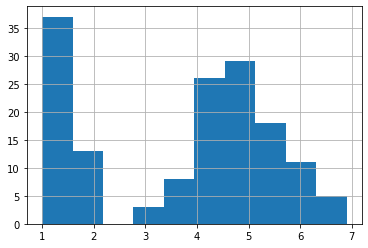

In [0]:
iris["petal_length"].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff839096d30>,
      dtype=object)

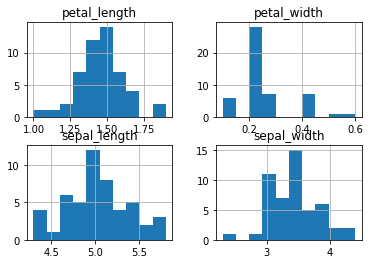

In [0]:
iris[iris["species"] == "setosa"].hist()

In [0]:
iris["species"].value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

In [0]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [0]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [0]:
iris["petal_length"].mean()

3.7586666666666693

In [0]:
iris[iris["petal_length"] > iris["petal_length"].mean()]['petal_length'].count()



93

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff8388aaa58>,
      dtype=object)

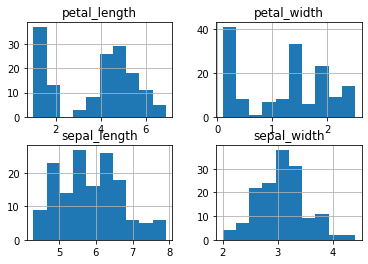

In [0]:
iris.hist()

# Zadania do wykonania

Zadania wstępne na zbiorze Iris:
1. Zwizualizuj rozkłady wybranych cech dla każdego gatunku (_species_) irysów z osobna
2. Przelicz ile przykładów irysów ma płatki dłuższe, niż średnia długość płatka (_petal length (cm)_)

Zadania na zbiorze Titanic:
3. Wczytaj zbiór titanic z adresu `https://dzkb.github.io/devmeeting-data-science/data/titanic.csv`
4. Wyświetl fragment wczytanego zbioru
5. Ustal:
  * co oznaczają odpowiednie kolumny
  * jakie typy danych występują w zbiorze
  * czy w zbiorze występują brakujące dane (NaN)
6. Zwizualizuj rozkłady cech w zbiorze
  * zwróć uwagę na rozkład wieku pasażerów, w zależności od tego czy przeżyli, czy zginęli

In [0]:
dataset = pd.read_csv('https://dzkb.github.io/devmeeting-data-science/data/titanic.csv')

In [0]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
d = dataset
d = d[d.Cabin.isnull()]
len(d)

687

In [0]:
d = dataset
d = d[d.Age.isnull()]
len(d)

177

In [0]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff836e9d128>,
      dtype=object)

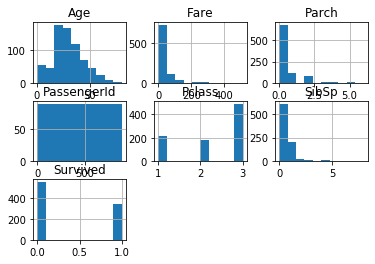

In [0]:
dataset.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff836bd4d30>]],
      dtype=object)

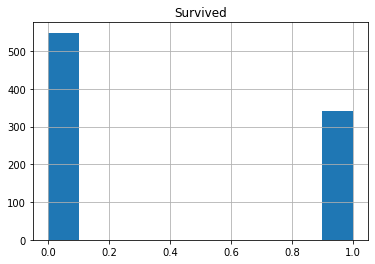

In [0]:
dataset.hist('Survived')

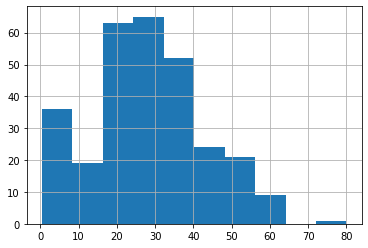

In [0]:
dataset[dataset['Survived'] == 1]['Age'].hist()

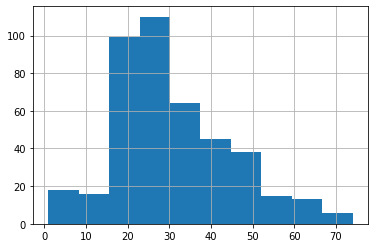

In [0]:
dataset[dataset['Survived'] == 0]['Age'].hist()